In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/SHQ/Data/cfa_test_df2.csv')

In [ ]:
df.head()

,age,gender,hand,navigating_skills,sleep,edu_level,commute_level,home_env
0,68.0,0,0,1,8.0,0,0,2
1,18.0,1,1,2,7.0,1,0,1
2,18.0,1,1,3,7.0,1,2,2
3,21.0,0,0,2,7.0,0,1,1
4,36.0,1,0,3,5.0,0,1,0


In [ ]:
# convert some variables to categorical variables and then dummy

test_df = df.copy()
navigation_skills_mapper = {0: 'very bad', 1: 'bad', 2: 'good', 3: 'very good'}
test_df['navigating_skills'] = test_df['navigating_skills'].replace(navigation_skills_mapper)

commute_level_mapper = {0: 'less 30 min', 1: '30 min to 1 h', 2: 'hour plus'}
test_df['commute_level'] = test_df['commute_level'].replace(commute_level_mapper)

env_level_mapper = {0: 'rural', 1: 'mixed', 2: 'urban'}
test_df['home_env'] = test_df['home_env'].replace(env_level_mapper)

test_df = pd.get_dummies(test_df, columns= ["commute_level", "home_env"])

test_df['hand'] = test_df['hand'].astype(str)
test_df['gender']= test_df['gender'].astype(str)
test_df['edu_level'] = test_df['edu_level'].astype(str)
test_df['commute_level_30 min to 1 h'] = test_df['commute_level_30 min to 1 h'].astype(str)
test_df['commute_level_hour plus'] = test_df['commute_level_hour plus'].astype(str)
test_df['commute_level_less 30 min'] = test_df['commute_level_less 30 min'].astype(str)
test_df['home_env_mixed'] = test_df['home_env_mixed'].astype(str)
test_df['home_env_rural'] = test_df['home_env_rural'].astype(str)
test_df['home_env_urban'] = test_df['home_env_urban'].astype(str)



In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909456 entries, 0 to 909455
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   age                          909456 non-null  float64
 1   gender                       909456 non-null  object 
 2   hand                         909456 non-null  object 
 3   navigating_skills            909456 non-null  object 
 4   sleep                        909456 non-null  float64
 5   edu_level                    909456 non-null  object 
 6   commute_level_30 min to 1 h  909456 non-null  object 
 7   commute_level_hour plus      909456 non-null  object 
 8   commute_level_less 30 min    909456 non-null  object 
 9   home_env_mixed               909456 non-null  object 
 10  home_env_rural               909456 non-null  object 
 11  home_env_urban               909456 non-null  object 
dtypes: float64(2), object(10)
memory usage: 83.3+ MB


In [ ]:
df = test_df.copy()

## Oversampling

In [ ]:
!pip uninstall scikit-learn -y


Found existing installation: scikit-learn 1.0
Uninstalling scikit-learn-1.0:
  Successfully uninstalled scikit-learn-1.0


In [ ]:
!pip install -U scikit-learn


  Using cached scikit_learn-1.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (23.1 MB)


In [ ]:
import sklearn

sklearn.__version__

'1.0'

In [ ]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence, PartialDependenceDisplay
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier

import matplotlib.pyplot as plt

from time import time


Class=1, n=101941 (11.209%)
Class=2, n=508156 (55.875%)
Class=3, n=281203 (30.920%)
Class=0, n=18156 (1.996%)


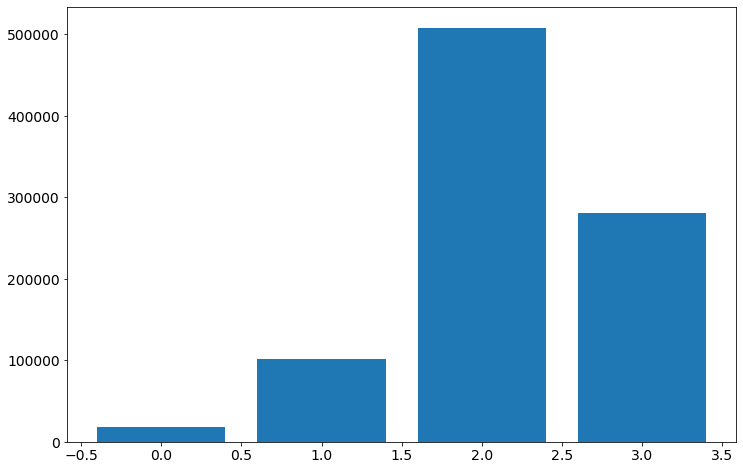

In [ ]:
# summarize distribution
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder


# label encode the target variable
y = LabelEncoder().fit_transform(y)

counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
!pip install -U imbalanced-learn


     |████████████████████████████████| 189 kB 4.2 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [ ]:
# check version number
import imblearn
print(imblearn.__version__)



0.8.1


## Method1: SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE


Class=0, n=508156 (25.000%)
Class=1, n=508156 (25.000%)
Class=3, n=508156 (25.000%)
Class=2, n=508156 (25.000%)


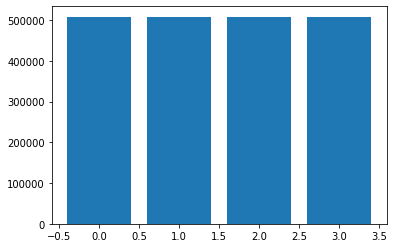

In [ ]:
# transform the dataset
y = LabelEncoder().fit_transform(y)

oversample = SMOTE()
Xo, yo = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(yo)
for k,v in counter.items():
	per = v / len(yo) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
test_df = df.copy()

In [ ]:
df_train, df_test = train_test_split(test_df, test_size=0.20)

features = ['age', 'gender', 'hand', 'navigating_skills', 'sleep', 'edu_level',
       'commute_level_30 min to 1 h', 'commute_level_hour plus',
       'commute_level_less 30 min', 'home_env_mixed', 'home_env_rural',
       'home_env_urban']
df_train = df_train[features]
df_test = df_test[features]

X_train, y_train = df_train.drop('navigating_skills',axis=1), df_train['navigating_skills']
X_test, y_test = df_test.drop('navigating_skills',axis=1), df_test['navigating_skills']


## Method2. Auto-Banlance Setting

In [ ]:
model_rf = RandomForestClassifier(class_weight="balanced")
model_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [ ]:
x_train = X_train.astype(int)


In [ ]:
test_df = df.copy()

navigation_skills_mapper = {'very bad': 0, 'bad': 1, 'good': 2, 'very good': 3}
test_df['navigating_skills'] = test_df['navigating_skills'].replace(navigation_skills_mapper)

In [ ]:
test_df = df.copy()
test_df.head()

,age,gender,hand,navigating_skills,sleep,edu_level,commute_level_30 min to 1 h,commute_level_hour plus,commute_level_less 30 min,home_env_mixed,home_env_rural,home_env_urban
0,68.0,0,0,bad,8.0,0,0,0,1,0,0,1
1,18.0,1,1,good,7.0,1,0,0,1,1,0,0
2,18.0,1,1,very good,7.0,1,0,1,0,0,0,1
3,21.0,0,0,good,7.0,0,1,0,0,1,0,0
4,36.0,1,0,very good,5.0,0,1,0,0,0,1,0


In [ ]:
test_df = pd.get_dummies(test_df, columns= ["navigating_skills"])
test_df.head()

,age,gender,hand,sleep,edu_level,commute_level_30 min to 1 h,commute_level_hour plus,commute_level_less 30 min,home_env_mixed,home_env_rural,home_env_urban,navigating_skills_bad,navigating_skills_good,navigating_skills_very bad,navigating_skills_very good
0,68.0,0,0,8.0,0,0,0,1,0,0,1,1,0,0,0
1,18.0,1,1,7.0,1,0,0,1,1,0,0,0,1,0,0
2,18.0,1,1,7.0,1,0,1,0,0,0,1,0,0,0,1
3,21.0,0,0,7.0,0,1,0,0,1,0,0,0,1,0,0
4,36.0,1,0,5.0,0,1,0,0,0,1,0,0,0,0,1


In [ ]:
df_train, df_test = train_test_split(test_df, test_size=0.20)

features = ['age', 'gender', 'hand', 'sleep', 'edu_level',
       'commute_level_30 min to 1 h', 'commute_level_hour plus',
       'commute_level_less 30 min', 'home_env_mixed', 'home_env_rural',
       'home_env_urban', 'navigating_skills_bad', 'navigating_skills_good',	'navigating_skills_very bad',	'navigating_skills_very good']
df_train = df_train[features]
df_test = df_test[features]

X_train, y_train = df_train.drop(['navigating_skills_bad', 'navigating_skills_good',	'navigating_skills_very bad',	'navigating_skills_very good'],axis=1), df_train[['navigating_skills_bad', 'navigating_skills_good',	'navigating_skills_very bad',	'navigating_skills_very good']]
X_test, y_test = df_test.drop(['navigating_skills_bad', 'navigating_skills_good',	'navigating_skills_very bad',	'navigating_skills_very good'],axis=1), df_test[['navigating_skills_bad', 'navigating_skills_good',	'navigating_skills_very bad',	'navigating_skills_very good']]



In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909456 entries, 0 to 909455
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   age                          909456 non-null  float64
 1   gender                       909456 non-null  object 
 2   hand                         909456 non-null  object 
 3   sleep                        909456 non-null  float64
 4   edu_level                    909456 non-null  object 
 5   commute_level_30 min to 1 h  909456 non-null  object 
 6   commute_level_hour plus      909456 non-null  object 
 7   commute_level_less 30 min    909456 non-null  object 
 8   home_env_mixed               909456 non-null  object 
 9   home_env_rural               909456 non-null  object 
 10  home_env_urban               909456 non-null  object 
 11  navigating_skills_bad        909456 non-null  uint8  
 12  navigating_skills_good       909456 non-null  uint8  
 13 

In [ ]:
len(test_df)/len(test_df[test_df['navigating_skills_very good'] == 1])

3.234161797704861

## Method3: Manually Adjust Category Weight Settings

In [ ]:
model_rf = RandomForestClassifier(class_weight= [{0: 1, 1: 7.9}, {0: 1, 1: 0.78}, {0: 1, 1: 49}, {0: 1, 1: 2.23}]) #[{'navigating_skills_bad':20273,'navigating_skills_good':101544, 'navigating_skills_very bad':3643,	'navigating_skills_very good':56432 }])
model_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight=[{0: 1, 1: 7.9}, {0: 1, 1: 0.78},
                                     {0: 1, 1: 49}, {0: 1, 1: 2.23}])

In [ ]:
X_train

,age,gender,hand,sleep,edu_level,commute_level_30 min to 1 h,commute_level_hour plus,commute_level_less 30 min,home_env_mixed,home_env_rural,home_env_urban
812989,35.0,0,0,8.0,0,1,0,0,1,0,0
368513,49.0,0,0,4.0,0,0,1,0,1,0,0
523783,49.0,1,1,6.0,1,1,0,0,1,0,0
97194,22.0,0,0,8.0,1,1,0,0,1,0,0
538200,49.0,0,1,6.0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
284220,19.0,1,0,8.0,1,0,0,1,1,0,0
41905,37.0,1,0,8.0,0,1,0,0,1,0,0
842980,50.0,0,0,6.0,0,1,0,0,1,0,0
198220,57.0,1,0,7.0,0,0,0,1,0,0,1


In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
predictions = model_rf.predict_proba(X_test)


In [ ]:
def confusion_matrix_scorer(clf, X, y):
    y_pred = clf.predict(X)
    cm = confusion_matrix(y, y_pred)
    return {'tn': cm[0, 0], 'fp': cm[0, 1],
            'fn': cm[1, 0], 'tp': cm[1, 1]}
cv_results = cross_validate(svm, X, y, cv=5,
                            scoring=confusion_matrix_scorer)

In [ ]:
df_test2 = df_test.copy()
df_test2['gender'] = df_test2['gender'].astype(int)
df_test2['hand'] = df_test2['hand'].astype(int)
df_test2['edu_level'] = df_test2['edu_level'].astype(int)
df_test2['commute_level_30 min to 1 h'] = df_test2['commute_level_30 min to 1 h'].astype(int)
df_test2['commute_level_hour plus'] = df_test2['commute_level_hour plus'].astype(int)
df_test2['commute_level_less 30 min'] = df_test2['commute_level_less 30 min'].astype(int)
df_test2['home_env_mixed'] = df_test2['home_env_mixed'].astype(int)
df_test2['home_env_rural'] = df_test2['home_env_rural'].astype(int)
df_test2['home_env_urban'] = df_test2['home_env_urban'].astype(int)


In [ ]:
df_train, df_test = train_test_split(df_test2, test_size=0.20)

#features = ['age', 'gender', 'hand', 'navigating_skills', 'sleep', 'edu_level', 'commute_level', 'home_env']
features = ['age', 'gender', 'hand', 'navigating_skills', 'sleep', 'edu_level', 'commute_level_30 min to 1 h', 'commute_level_hour plus', 'commute_level_less 30 min', 'home_env_mixed', 'home_env_rural', 'home_env_urban']


df_train = df_train[features]
df_test = df_test[features]

X_train, y_train = df_train.drop('navigating_skills',axis=1), df_train['navigating_skills']
X_test, y_test = df_test.drop('navigating_skills',axis=1), df_test['navigating_skills']

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
#predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 56.17%


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


print(confusion_matrix(y_test, model_rf.predict(X_test)))


[[ 6763  3511  5249  4970]
 [24257 21584 19778 35877]
 [ 1208   589   996   782]
 [ 8896  9907  8046 29479]]


In [ ]:
print(classification_report(y_test, model_rf.predict(X_test)))


              precision    recall  f1-score   support

         bad       0.16      0.32      0.22     20273
        good       0.61      0.22      0.32    101544
    very bad       0.03      0.30      0.06      3643
   very good       0.42      0.53      0.46     56432

    accuracy                           0.33    181892
   macro avg       0.30      0.34      0.26    181892
weighted avg       0.49      0.33      0.35    181892



In [ ]:
print(classification_report(y_test, model_rf.predict(X_test)))


              precision    recall  f1-score   support

         bad       0.16      0.33      0.22     20493
        good       0.61      0.21      0.31    101496
    very bad       0.03      0.28      0.05      3575
   very good       0.41      0.52      0.46     56328

    accuracy                           0.32    181892
   macro avg       0.30      0.34      0.26    181892
weighted avg       0.49      0.32      0.34    181892



In [ ]:
accuracy = accuracy_score(y_test, model_rf.predict(X_test))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 55.80%


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         bad       0.00      0.00      0.00       829
        good       0.57      0.95      0.71      4062
    very bad       0.00      0.00      0.00       132
   very good       0.49      0.11      0.18      2253

    accuracy                           0.56      7276
   macro avg       0.26      0.26      0.22      7276
weighted avg       0.47      0.56      0.45      7276



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(y_test,  model_rf.predict(X_test)))


0.5499967013392563


In [ ]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=iris.target_names, index=iris.target_names)
sns.heatmap(cm, annot=True)

In [ ]:
model_rf

RandomForestClassifier(class_weight='balanced')

In [ ]:
print(accuracy_score(y_test,  model_rf.predict(X_test)))


0.3233897037802652
